**World Indicators**

**Introduction**


The analysis period spans from 1990 to 2024 on a global scale, but focuses on countries that allow for relevant comparisons, particularly to situate Chile within the Latin American context.

The aim is to contrast opinions with objective data on Chile, especially when it is described as a leading country in the region. Likewise, it examines the demands for greater state funding—based on the argument that Chile has sufficient resources—versus those who claim that resources are limited and advocate for private sector involvement to meet social demands.

In [760]:
#Libraries to use
import pandas as pd
from pandas_datareader import wb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.patches import Patch
import warnings

**Países del Banco Mundial**

In [762]:
countries = wb.get_countries()
countries.head(2)

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN


In [763]:
# Contar países por regiones
conteo_paises_region = countries['region'].value_counts().reset_index()
conteo_paises_region.columns = ['region', 'número_de_países']
print(conteo_paises_region)

                       region  número_de_países
0                  Aggregates                79
1       Europe & Central Asia                58
2         Sub-Saharan Africa                 48
3  Latin America & Caribbean                 42
4         East Asia & Pacific                37
5  Middle East & North Africa                21
6                  South Asia                 8
7               North America                 3


In [764]:
# Contar países por su clasificación
conteo_paises_clasificacion = countries['incomeLevel'].value_counts().reset_index()
print(conteo_paises_clasificacion)

           incomeLevel  count
0          High income     85
1           Aggregates     79
2  Upper middle income     54
3  Lower middle income     51
4           Low income     26
5       Not classified      1


**Países**

Aquí se detalla el país o los países utilizados en el análisis. Se crearan listas según se va avanzando el analisis y se requiera revisar algun  conjunto de países, etc. 


In [766]:
#Primer grupo. Países que son parte de la OCDE

#Lista de países (actualizada a 2023). 
oecd_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 
    'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
    'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 
    'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']

#Segundo grupo. Países de América Central y del Sur

central_south_america = ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala',
    'Honduras', 'Nicaragua', 'Panama', 'Antigua and Barbuda', 'Bahamas',
    'Barbados', 'Cuba', 'Dominica', 'Grenada', 'Haiti', 'Jamaica',
    'Dominican Republic', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines',
    'Saint Lucia', 'Trinidad and Tobago', 'Argentina', 'Bolivia', 'Brazil', 'Chile',
    'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

In [767]:
type(central_south_america)

list

**Función para obtener los datos del indicador**

In [769]:
def descargar_datos_wb(indicadores, paises, inicio, fin):      
    dfs = []
    
    for nombre, indicador in indicadores.items():
        try:
            # Descargar datos para el indicador actual
            df = wb.download(
                indicator=indicador,
                country=paises,
                start=inicio,
                end=fin
            )
            
            df.reset_index(inplace=True)
            df['indicador'] = nombre  # Agregar columna con nombre del indicador
            df.rename(columns={indicador: 'valor'}, inplace=True)
            
            dfs.append(df)
            
        except Exception as e:
            print(f"Error al descargar el indicador {nombre} ({indicador}): {str(e)}")
    
    # Combinar todos los DataFrames
    if dfs:
        df_final = pd.concat(dfs, ignore_index=True)
        return df_final
    else:
        return pd.DataFrame()

**Gross Domestic Product (GDP)**


To analyze the relationship between GDP and fiscal spending, it is necessary to select the most appropriate indicator. For this purpose, the available indicators on the relevant portal will be reviewed to identify which one allows for a valid comparison with public expenditure. Additionally, the GDP measurement units will be assessed to choose the most suitable one for this analysis.

In [771]:
# Buscar indicadores relacionados con "gdp"
resultados = wb.search('gdp')

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar las primeras filas y también generar un archivo excel por una sola vez
#df_resultados.to_excel('GPD.xlsx')
df_resultados.head(3)

,id,name,unit,source,sourceNote,sourceOrganization,topics
688,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
689,6.0.GDP_growth,GDP growth (annual %),,LAC Equity Lab,Annual percentage growth rate of GDP at market...,b'World Development Indicators (World Bank)',Economy & Growth
690,6.0.GDP_usd,GDP (constant 2005 $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth


In [772]:
type(df_resultados)

pandas.core.frame.DataFrame

The selection of the indicator **NY.GDP.MKTP.KD.ZG** refers to the Annual percentage growth rate of Gross Domestic Product (GDP) at market prices in constant local currency. The data, expressed as a percentage, will initiate an introductory research process that will strengthen the analysis due to the correct and timely choice of indicators, which will reflect the political and social economy of post-dictatorship Chile.



**Comparative GDP Analysis: OECD Countries vs. Chile (1990-1993 vs. 2020-2023)**

This study examines the evolution of Gross Domestic Product (GDP) in OECD member countries, comparing their performance with Chile's across two key periods: the early 1990s (1990-1993) and recent years (2020-2023). It is worth noting that some analyzed countries, including Chile, were not OECD members during the first period (Chile joined in 2010), allowing for an assessment of their economic trajectory both before and after joining the organization.

The analysis aims to identify:

- Comparative economic growth trends

- Chile's relative evolution compared to OECD countries

- Changes in growth patterns between both periods

In [775]:
# Indicador seleccionado y los países del OCDE
indicadores = {
    'crecimiento del PIB': 'NY.GDP.MKTP.KD.ZG'
    }

paises = [
    'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI',
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC',
    'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 
    'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL',
    'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 
    'SWE', 'CHE', 'TUR', 'GBR', 'USA'
]

df_pib = descargar_datos_wb(indicadores, paises, '1990', '2023')
#df_pib.to_excel('pib.xlsx') #Exportar archivo para revisar la consistencia de los datos.
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1292 non-null   object 
 1   year       1292 non-null   object 
 2   valor      1285 non-null   float64
 3   indicador  1292 non-null   object 
dtypes: float64(1), object(3)
memory usage: 40.5+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_9652\2667942121.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(


In [777]:
# Convertir 'year' a numérico (si aún no lo está)
df_pib['year'] = pd.to_numeric(df_pib['year'], errors='coerce')

# Filtrar y sumar valores para 1990-1993
df_90 = df_pib[(df_pib['year'] >= 1990) & (df_pib['year'] <= 1995)].groupby('country')['valor'].sum().reset_index()
df_90 = df_90.rename(columns={'valor': 'sum_1990_1995'})  # Renombrar columna

# Ordenar el dataframe por sum_1990_1995 de forma descendente y agregar ranking
df_90 = df_90.sort_values('sum_1990_1995', ascending=False).reset_index(drop=True)
df_90['ranking_1990_1995'] = df_90.index + 1  # +1 para que empiece en 1 en lugar de 0

# Filtrar y sumar valores para 2010-2015
df_20 = df_pib[(df_pib['year'] >= 2010) & (df_pib['year'] <= 2015)].groupby('country')['valor'].sum().reset_index()
df_20 = df_20.rename(columns={'valor': 'sum_2010_2015'})  # Renombrar columna

# Hacer un left join para mantener todas las filas de df_20
df_20 = pd.merge(
    df_20,
    df_90[['country', 'ranking_1990_1995']],  # Seleccionar solo las columnas que necesitas
    on='country',  # Columna común para unir
    how='left'     # Mantener todas las filas del dataframe izquierdo
)

# Filtrar y sumar valores para 2020-2023
df_2020 = df_pib[(df_pib['year'] >= 2020) & (df_pib['year'] <= 2023)].groupby('country')['valor'].sum().reset_index()
df_2020 = df_2020.rename(columns={'valor': 'sum_2020_2023'})  # Renombrar columna



In [778]:
df_90.head(2)

,country,sum_1990_1995,ranking_1990_1995
0,"Korea, Rep.",52.614957,1
1,Chile,42.856943,2


In [779]:
df_20.head(2)

,country,sum_2010_2015,ranking_1990_1995
0,Australia,15.931417,12
1,Austria,7.173292,14


In [780]:
df_2020.head(2)

,country,sum_2020_2023
0,Australia,9.675955
1,Austria,2.800006


In [781]:
#countries es el dataframe creado con los países del Banco Mundial. 
#el cual tiene una variable llamada 'name' y que contiene los nombres de los países
#y para complementar los dataframe anteriores: df_90 y df_20 con otros datos, es 
#perentorio cambiar el nombre de esa variable y así tener una columna con el mismo nombre en todos los data df compartidos, 
#sino se da el caso, se renombra alguna columna, la que es igual en todos los df. Acá 
#name tiene los nombres de los países, pero en los otros data se llama esta columna; country
#por lo tanto, se le renombra con ese nombre 'country'

countries.rename(columns={'name': 'country'}, inplace=True)

In [782]:
# Hacer un left join para mantener todas las filas de df_90
df_90_completo = pd.merge(
    df_90,
    countries[['country', 'region', 'incomeLevel']],  # Seleccionar solo las columnas que necesitas
    on='country',  # Columna común para unir
    how='left'     # Mantener todas las filas del dataframe izquierdo (df_90)
)
df_90_completo.head(1)

,country,sum_1990_1995,ranking_1990_1995,region,incomeLevel
0,"Korea, Rep.",52.614957,1,East Asia & Pacific,High income


In [783]:
# Hacer un left join para mantener todas las filas de df_20
df_20_completo = pd.merge(
    df_20,
    countries[['country', 'region', 'incomeLevel']],  # Seleccionar solo las columnas que necesitas
    on='country',  # Columna común para unir
    how='left'     # Mantener todas las filas del dataframe izquierdo
)

df_20_completo.head(1)

,country,sum_2010_2015,ranking_1990_1995,region,incomeLevel
0,Australia,15.931417,12,East Asia & Pacific,High income


In [784]:
# Hacer un left join para mantener todas las filas de df_20
df_2020_completo = pd.merge(
    df_2020,
    countries[['country', 'region', 'incomeLevel']],  # Seleccionar solo las columnas que necesitas
    on='country',  # Columna común para unir
    how='left'     # Mantener todas las filas del dataframe izquierdo
)

df_2020_completo.head(1)

,country,sum_2020_2023,region,incomeLevel
0,Australia,9.675955,East Asia & Pacific,High income


**Comparative GDP, year 2023: American Latin Countries vs. OCDE Countries**



Comparative Analysis of GDP Growth in Chile Across Three Key Periods

The presented graphs depict the evolution of Chile's Gross Domestic Product (GDP) growth across three distinct periods. The first covers the 1990s (1990–1995), the second corresponds to the five years preceding the pandemic (2010–2015), and the third focuses on the post-pandemic recovery phase (2020–2023).

Public discourse has repeatedly emphasized that Chile's current economic performance significantly differs from the robust growth experienced during the early years of the Concertación government. This period, marked by economic liberalization following the military dictatorship, not only boosted consumption—evidenced, for example, by the proliferation of shopping malls and the revitalization of retail trade—but also substantially reduced historically persistent poverty levels in the country.

The second graph reflects the pre-pandemic phase, characterized by moderate growth in a more stable global context. Finally, the third graph illustrates the post-pandemic recovery, a period marked by global economic uncertainty and domestic reactivation challenges.

This comparison allows for an assessment of how Chile's economic growth cycles have varied, highlighting the structural and circumstantial factors that influenced each stage.



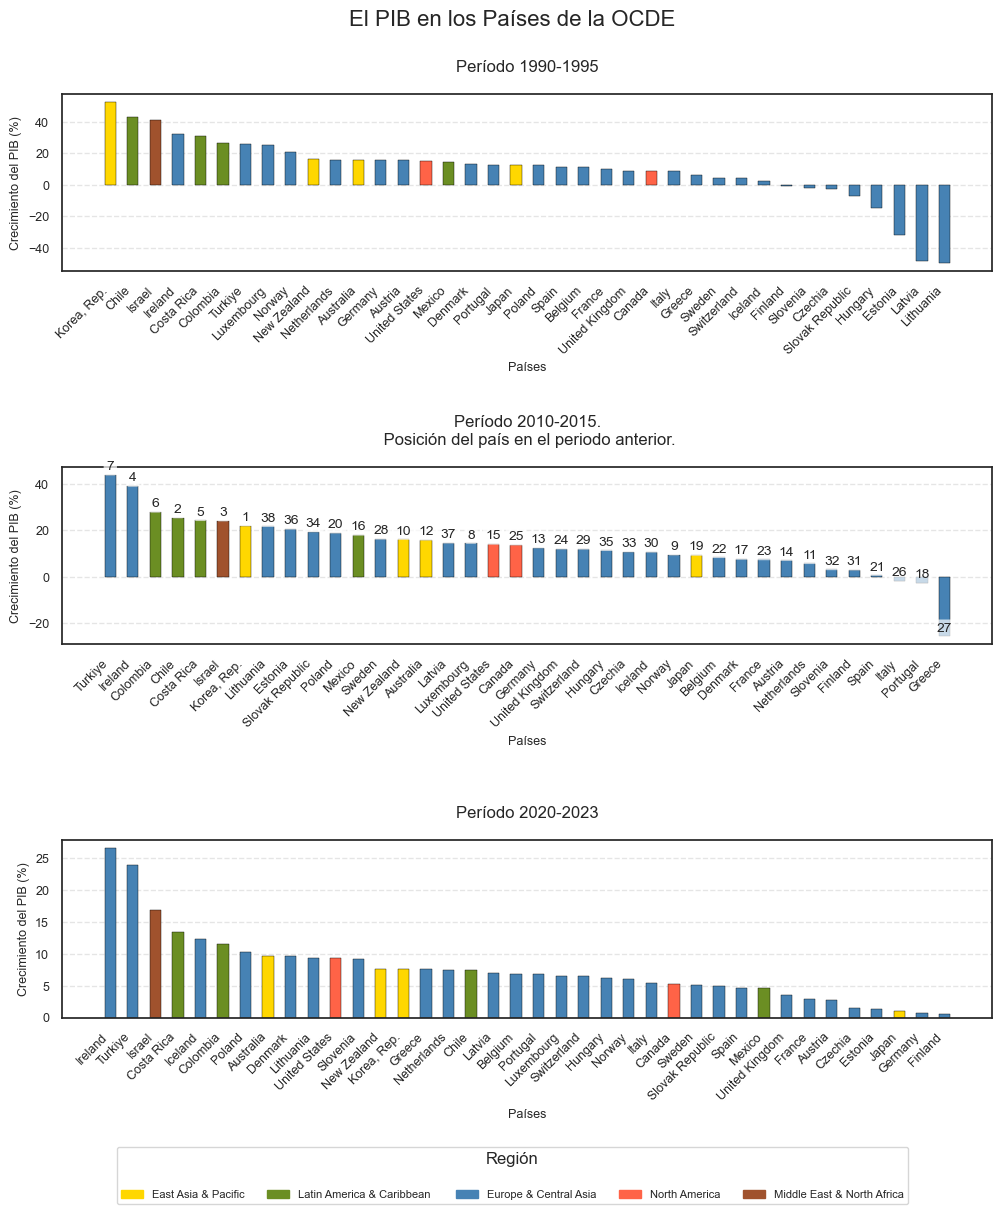

In [868]:
# --- Configuración de estilo ---
sns.set_theme(style="white")  # Fondo blanco para todos los gráficos

# --- Parámetros unificados ---
bar_width = 0.2
space_between_bars = 0.2
fontsize_labels = 9
fontsize_ticks = 9
rotation_xticks = 45

# --- Colores por región ---
color_por_region = {
    'East Asia & Pacific': 'gold',
    'Latin America & Caribbean ': 'olivedrab',
    'Europe & Central Asia': 'steelblue',
    'North America': 'tomato',
    'Middle East & North Africa': 'sienna'
}

# --- Función para graficar ---
def plot_growth(ax, df, x_positions, column, title, ranking_column=None):
    df_sorted = df.sort_values(column, ascending=False)
    bars = ax.bar(
        x_positions,
        df_sorted[column],
        width=bar_width,
        color=[color_por_region.get(region, 'gray') for region in df_sorted['region']],
        edgecolor='black',
        linewidth=0.3
    )
    
    ax.set_title(title, fontsize=12, pad=16)
    ax.set_xlabel('Países', fontsize=fontsize_labels)
    ax.set_ylabel('Crecimiento del PIB (%)', fontsize=fontsize_labels)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(df_sorted['country'], rotation=rotation_xticks, ha='right', fontsize=fontsize_ticks)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Añade esto para ajustar los ticks del eje Y
    ax.tick_params(axis='y', labelsize=fontsize_ticks)  # <<--- Nueva línea
    
    # Añadir rankings si se especifica
    if ranking_column:
        for bar, valor, ranking in zip(bars, df_sorted[column], df_sorted[ranking_column]):
            ax.text(
                bar.get_x() + bar.get_width()/2,
                valor + (0.02 * df_sorted[column].max()),
                str(int(ranking)),
                ha='center',
                va='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2')
            )
    return bars

# --- Figura y subplots ---
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
fig.suptitle('El PIB en los Países de la OCDE\n', fontsize=16, y=0.95)
plt.subplots_adjust(hspace=1.1)

# Posiciones x comunes
x_positions = np.arange(len(df_90_completo['country'])) * (bar_width + space_between_bars)


# --- Generación de gráficos ---
plot_growth(axes[0], df_90_completo, x_positions, 'sum_1990_1995', 'Período 1990-1995')
plot_growth(axes[1], df_20_completo, x_positions, 'sum_2010_2015', 'Período 2010-2015.\n Posición del país en el periodo anterior.', 'ranking_1990_1995')
plot_growth(axes[2], df_2020_completo, x_positions, 'sum_2020_2023', 'Período 2020-2023')

# --- Leyenda ---
handles = [Patch(color=color, label=region) for region, color in color_por_region.items()]
fig.legend(
    handles=handles,
    title='Región\n',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=5,
    fontsize=8
)

plt.show()

In [787]:
# Indicador a explorar:
indicadores = {
    'crecimiento del PIB': 'NY.GDP.MKTP.KD.ZG'
    }

paises = ['BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'NIC', 'PAN', 'ATG', 'BHS', 
          'BRB', 'CUB', 'DMA', 'GRD', 'HTI', 'JAM', 'DOM', 'KNA', 'VCT', 
          'LCA', 'TTO', 'ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 
          'PRY', 'PER', 'SUR', 'URY', 'VEN']

pib_america = descargar_datos_wb(indicadores, paises, '2023', '2023')
pib_america.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    32 non-null     object 
 1   year       32 non-null     object 
 2   valor      31 non-null     float64
 3   indicador  32 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_9652\2667942121.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(


In [788]:
pib_america.to_excel('pib_america.xlsx')

In [789]:
pib_america.head(2)

,country,year,valor,indicador
0,Argentina,2023,-1.611002,crecimiento del PIB
1,Antigua and Barbuda,2023,3.862012,crecimiento del PIB


In [790]:
#Revisando los datos de los paíse de la OCDE
df_pib

,country,year,valor,indicador
0,Australia,2023,3.441992,crecimiento del PIB
1,Australia,2022,4.242386,crecimiento del PIB
2,Australia,2021,2.111168,crecimiento del PIB
3,Australia,2020,-0.119591,crecimiento del PIB
4,Australia,2019,2.171545,crecimiento del PIB
...,...,...,...,...
1287,United States,1994,4.029023,crecimiento del PIB
1288,United States,1993,2.751796,crecimiento del PIB
1289,United States,1992,3.522497,crecimiento del PIB
1290,United States,1991,-0.108313,crecimiento del PIB


In [791]:
# Generar un data frame con solo el año "2023"
anio_seleccionado = '2023'  

# Filtrar el DataFrame por el estado seleccionado
pib_OCDE = df_pib[df_pib['year'] == anio_seleccionado]
pib_OCDE.head(2)

,country,year,valor,indicador


In [792]:
#Ahora se desea obtener el promedio del crecimiento del PIB de los países OCDE
OCDE_prom = pib_OCDE['valor'].mean()
round(OCDE_prom, 2)

nan

In [793]:
# Mapeo de códigos ISO a nombres de países en inglés
iso_to_country = {
    'AUS': 'Australia',
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'CAN': 'Canada',
    'CHL': 'Chile',
    'COL': 'Colombia',
    'CRI': 'Costa Rica',
    'CZE': 'Czech Republic',
    'DNK': 'Denmark',
    'EST': 'Estonia',
    'FIN': 'Finland',
    'FRA': 'France',
    'DEU': 'Germany',
    'GRC': 'Greece',
    'HUN': 'Hungary',
    'ISL': 'Iceland',
    'IRL': 'Ireland',
    'ISR': 'Israel',
    'ITA': 'Italy',
    'JPN': 'Japan',
    'KOR': 'South Korea',
    'LVA': 'Latvia',
    'LTU': 'Lithuania',
    'LUX': 'Luxembourg',
    'MEX': 'Mexico',
    'NLD': 'Netherlands',
    'NZL': 'New Zealand',
    'NOR': 'Norway',
    'POL': 'Poland',
    'PRT': 'Portugal',
    'SVK': 'Slovakia',
    'SVN': 'Slovenia',
    'ESP': 'Spain',
    'SWE': 'Sweden',
    'CHE': 'Switzerland',
    'TUR': 'Turkey',
    'GBR': 'United Kingdom',
    'USA': 'United States'
}

# Lista de códigos de países (la que proporcionaste)
paises = [
    'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI',
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC',
    'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 
    'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL',
    'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 
    'SWE', 'CHE', 'TUR', 'GBR', 'USA'
]

# Crear el DataFrame
OCDE = pd.DataFrame({
    'country': [iso_to_country[code] for code in paises],  # Nombres en inglés
    'entidad': 'OCDE'  # Valor constante
})

# Mostrar las primeras filas
OCDE.head()

,country,entidad
0,Australia,OCDE
1,Austria,OCDE
2,Belgium,OCDE
3,Canada,OCDE
4,Chile,OCDE


In [794]:
# Hacer el left join
pib_america = pd.merge(
    pib_america,
    OCDE[['country', 'entidad']],  # Seleccionar solo las columnas necesarias
    on='country',
    how='left'
)

In [795]:
pib_america.head(2)

,country,year,valor,indicador,entidad
0,Argentina,2023,-1.611002,crecimiento del PIB,NaN
1,Antigua and Barbuda,2023,3.862012,crecimiento del PIB,NaN


posx and posy should be finite values
posx and posy should be finite values


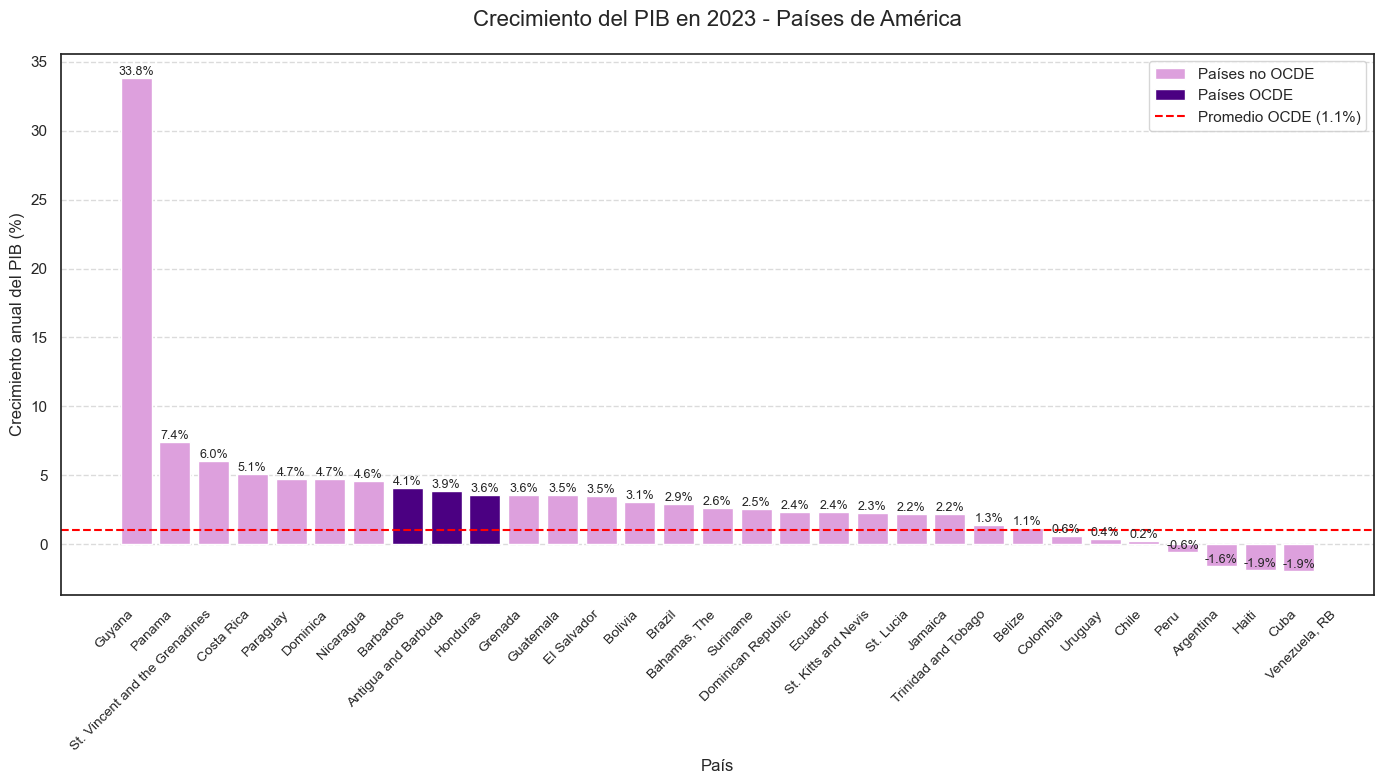

In [796]:
# 1. Definir colores basados en la columna 'entidad'
colors = ['indigo' if entidad == 'OCDE' else 'plum' for entidad in pib_america['entidad']]

# 2. Ordenar los valores para mejor visualización
pib_america = pib_america.sort_values('valor', ascending=False)

# 3. Crear el gráfico de barras vertical
plt.figure(figsize=(14, 8))
bars = plt.bar(
    pib_america['country'],  
    pib_america['valor'],
    color=colors  # Usar la lista de colores personalizada
)

# --- Agregar línea del promedio OCDE ---
OCDE_prom = 1.05
plt.axhline(
    y=OCDE_prom, 
    color='red', 
    linestyle='--', 
    linewidth=1.5,
    label=f'Promedio OCDE ({OCDE_prom:.1f}%)'
)

# 4. Personalizar el gráfico
plt.title('Crecimiento del PIB en 2023 - Países de América', fontsize=16, pad=20)
plt.xlabel('País', fontsize=12)
plt.ylabel('Crecimiento anual del PIB (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Añadir etiquetas de valor en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height,
        f'{height:.1f}%',
        ha='center', 
        va='bottom',
        fontsize=9
    )

# 6. Leyenda personalizada para los colores
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='plum', label='Países no OCDE'),
    Patch(facecolor='indigo', label='Países OCDE'),
    plt.Line2D([0], [0], color='red', linestyle='--', label=f'Promedio OCDE ({OCDE_prom:.1f}%)')
]
plt.legend(handles=legend_elements, loc='upper right')

# 7. Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

In [797]:
# Indicador a explorar:
indicadores = {
    'gasto_militar': 'MS.MIL.XPND.GD.ZS',
    'gasto_corriente_salud': 'SH.XPD.CHEX.GD.ZS',
    'gasto_publico_educacion': 'SE.XPD.TOTL.GD.ZS',
    'gasto_investigacion_desarrollo':'GB.XPD.RSDV.GD.ZS',
}

paises = ['CHL']

df_datos = descargar_datos_wb(indicadores, paises, '1990', '2024')
df_datos.info()

C:\Users\Paula\AppData\Local\Temp\ipykernel_9652\2667942121.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(
C:\Users\Paula\AppData\Local\Temp\ipykernel_9652\2667942121.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(
C:\Users\Paula\AppData\Local\Temp\ipykernel_9652\2667942121.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    140 non-null    object 
 1   year       140 non-null    object 
 2   valor      101 non-null    float64
 3   indicador  140 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.5+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_9652\2667942121.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(


In [798]:
# Agrupar por 'indicador' y aplicar describe() a 'valor'
descripcion_por_indicador = df_datos.groupby('indicador')['valor'].describe()

descripcion_por_indicador

,count,mean,std,min,25%,50%,75%,max
indicador,,,,,,,,
gasto_corriente_salud,24.0,7.845917,1.279334,6.072356,6.887610,7.250373,9.105489,10.095326
gasto_investigacion_desarrollo,15.0,0.358137,0.021188,0.311430,0.347655,0.360410,0.372975,0.390300
gasto_militar,34.0,2.336439,0.412634,1.548322,1.973986,2.473761,2.620769,3.401655
gasto_publico_educacion,28.0,3.941245,1.044306,2.250160,3.184907,3.855295,4.789735,5.629930


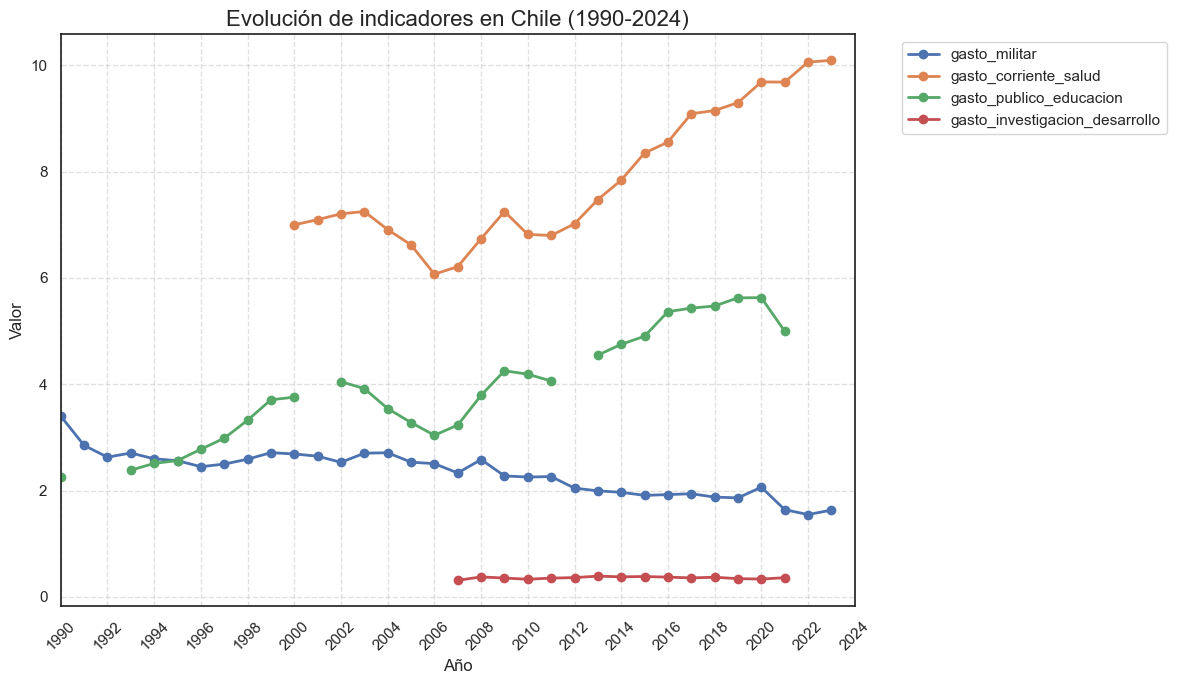

In [799]:
plt.figure(figsize=(12, 7))
df_datos['year'] = df_datos['year'].astype(int)  # Antes de graficar

# Iterar por cada indicador único
for indicador in df_datos['indicador'].unique():
    subset = df_datos[df_datos['indicador'] == indicador]
    plt.plot(subset['year'], subset['valor'], 
             label=indicador, 
             marker='o', 
             linewidth=2)

# Configuración del eje X (años)
years = df_datos['year'].unique()  # Obtener todos los años únicos
pares = [year for year in years if year % 2 == 0]  # Filtrar solo pares
plt.xticks(pares)  # Establecer ticks solo para años pares

# Asegurar orden cronológico (de menor a mayor)
plt.xlim(min(years), max(years))  # Límites del eje X

plt.title('Evolución de indicadores en Chile (1990-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**NY.GDP.PCAP.CD** GDP per capita (current US$) (2023)

In [801]:
min_wave= pd.read_csv('sueldo_minimo_historico.csv')
min_wave

,ref_area.label,source.label,indicator.label,classif1.label,time,obs_value,note_indicator.label,note_source.label
0,Bulgaria,ADM - Legislación Laboral,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2024,933.000,Tipo de salario mínimo: Salario mínimo único n...,Repositorio: Eurostat | Período de referencia ...
1,Bulgaria,ADM - Legislación Laboral,Salario mínimo nominal mensual bruto,Divisa: $ PPA 2021,2024,1109.817,Tipo de salario mínimo: Salario mínimo único n...,Repositorio: Eurostat | Período de referencia ...
2,Bulgaria,ADM - Legislación Laboral,Salario mínimo nominal mensual bruto,Divisa: Dólar estadounidense,2024,516.085,Tipo de salario mínimo: Salario mínimo único n...,Repositorio: Eurostat | Período de referencia ...
3,Bulgaria,ADM - Legislación Laboral,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2023,780.000,Tipo de salario mínimo: Salario mínimo único n...,Repositorio: Eurostat | Período de referencia ...
4,Bulgaria,ADM - Legislación Laboral,Salario mínimo nominal mensual bruto,Divisa: $ PPA 2021,2023,980.332,Tipo de salario mínimo: Salario mínimo único n...,Repositorio: Eurostat | Período de referencia ...
...,...,...,...,...,...,...,...,...
610,Polonia,ADM - Legislación Laboral,Salario mínimo nominal mensual bruto,Divisa: $ PPA 2021,1996,247.318,Moneda: POL - Zloty (PLN),NaN
611,Polonia,ADM - Legislación Laboral,Salario mínimo nominal mensual bruto,Divisa: Dólar estadounidense,1996,137.235,Moneda: POL - Zloty (PLN),NaN
612,Polonia,ADM - Legislación Laboral,Salario mínimo nominal mensual bruto,Divisa: Moneda local,1995,305.000,Moneda: POL - Zloty (PLN),NaN
613,Polonia,ADM - Legislación Laboral,Salario mínimo nominal mensual bruto,Divisa: $ PPA 2021,1995,237.383,Moneda: POL - Zloty (PLN),NaN


In [802]:
min_wave.columns

Index(['ref_area.label', 'source.label', 'indicator.label', 'classif1.label',
       'time', 'obs_value', 'note_indicator.label', 'note_source.label'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


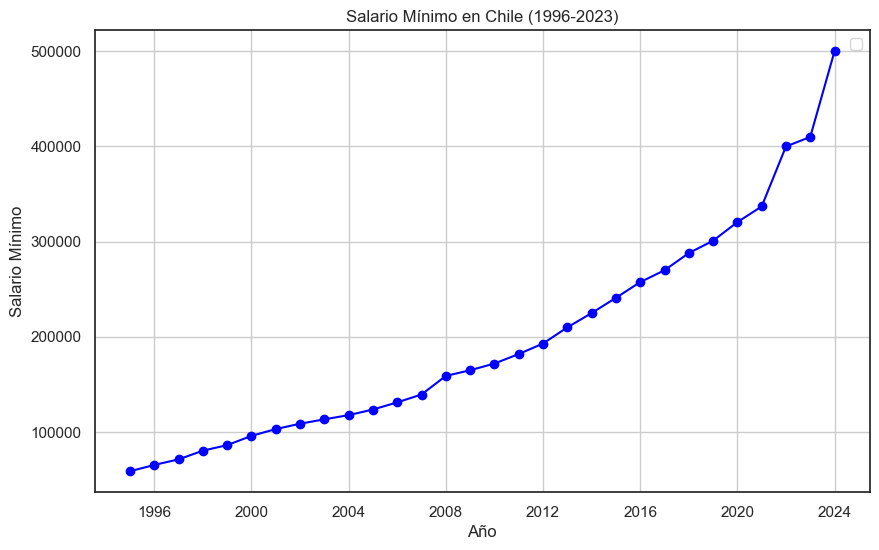

In [803]:
# Filtrar: Chile, "Currency: Local currency" y Total
df_chile = min_wave[
    (min_wave['ref_area.label'] == 'Chile') & 
    (min_wave['classif1.label'] == 'Divisa: Moneda local')
].copy()

df_chile['time'] = pd.to_datetime(df_chile['time'], format='%Y')

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_chile['time'], df_chile['obs_value'], marker='o', color='blue')
plt.title('Salario Mínimo en Chile (1996-2023)')
plt.xlabel('Año')
plt.ylabel('Salario Mínimo')
plt.grid(True)
plt.legend()
plt.show()

In [804]:
df_chile

,ref_area.label,source.label,indicator.label,classif1.label,time,obs_value,note_indicator.label,note_source.label
78,Chile,OIT - SIALC Estimaciones,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2024-01-01,500000.0,Tipo de salario mínimo: Para adultos | Moneda:...,NaN
81,Chile,OIT - SIALC Estimaciones,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2023-01-01,410000.0,Tipo de salario mínimo: Para adultos | Moneda:...,NaN
84,Chile,OIT - SIALC Estimaciones,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2022-01-01,400000.0,Tipo de salario mínimo: Para adultos | Moneda:...,NaN
87,Chile,OIT - SIALC Estimaciones,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2021-01-01,337000.0,Tipo de salario mínimo: Para adultos | Moneda:...,NaN
90,Chile,OIT - SIALC Estimaciones,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2020-01-01,320500.0,Tipo de salario mínimo: Para adultos | Moneda:...,NaN
93,Chile,OIT - SIALC Estimaciones,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2019-01-01,301000.0,Tipo de salario mínimo: Para adultos | Moneda:...,NaN
96,Chile,OIT - SIALC Estimaciones,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2018-01-01,288000.0,Tipo de salario mínimo: Para adultos | Moneda:...,NaN
99,Chile,OIT - SIALC Estimaciones,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2017-01-01,270000.0,Tipo de salario mínimo: Para adultos | Moneda:...,NaN
102,Chile,OIT - SIALC Estimaciones,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2016-01-01,257500.0,Tipo de salario mínimo: Para adultos | Moneda:...,NaN
105,Chile,OIT - SIALC Estimaciones,Salario mínimo nominal mensual bruto,Divisa: Moneda local,2015-01-01,241000.0,Tipo de salario mínimo: Para adultos | Moneda:...,NaN
